In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import os
import sys
from scipy.stats import norm
from sklearn import preprocessing

debug = True

# Part A

In [5]:
def normalize(x):
    
    X1 = []
    X2 = []
    for i in x:
        X1.append(i[0])
        X2.append(i[1])
    
    mean = np.mean(X1)
    std = np.std(X1)
    
    X1 = X1-mean
    X1=X1/std
    
    mean = np.mean(X2)
    std = np.std(X2)
        
    X2 = X2-mean
    X2=X2/std
    
    x=[]
    
    for i in range(len(X2)):
        x.append([X1[i],X2[i]])
    
    return x
        

In [6]:
def g(theta,x):
    hyp = np.dot(theta.transpose(),x)
    return 1 / (1 + np.exp(-1*hyp))

# log likelyhood of theta
def log_l(x,y,theta):
    sm = 0
    
    for i in range(len(y)):
        sm += y[i] * np.log(g(theta, x[i]))
        sm +=(1 - y[i])*np.log(1 - g(theta, x[i]))
    return sm

# first order derivative of log likelyhood over all the dim
def d_log_l(x,y,theta):
    sm = np.zeros((x.shape[1],1))
    
    for i in range(x.shape[1]): # this is dimentional space
        for j in range(x.shape[0]): # number of items
            sm[i] += (y[j]-g(theta,x[j]) )*x[j][i]
    
    return sm

# second order derivative of log likelyhood over all the dimentions    
def dd_log_l(x,y,theta):
    
    # hessian is the partial derivative over two dimentions
    # hessian is symmetric matrix hessian[i][j] = hessian[j][i]
    sm = np.zeros((x.shape[1],x.shape[1]))
    
    for i in range(x.shape[1]):
        for j in range(x.shape[1]):
            for k in range(x.shape[0]):
                sm[i][j] += g(theta,x[k])*(1-g(theta,x[k]))*x[k][i]*x[k][j]
    
    return sm


def newton(x,y,threshold,learning_rate):
    theta = np.zeros((x.shape[1],1))
    
    error_p = log_l(x,y,theta)
    error_lis = []
    error_lis.append(error_p)
    
    epoch = 0
    while(True):
        epoch+=1
        
        theta = theta + learning_rate*np.matmul((np.linalg.inv(dd_log_l(x,y,theta))), d_log_l(x,y,theta))
        error = log_l(x,y,theta)
        error_lis.append(error)
        if(abs(error_p - error) < threshold or epoch > 30):
            return theta,error_lis,epoch
        error_p = error


In [10]:
X = genfromtxt('data/q3/logisticX.csv', delimiter=',')
Y = genfromtxt('data/q3/logisticY.csv',delimiter=',')

X_normal = normalize(X)

# Add intercept
X_normal = np.hstack((np.ones((len(X), 1)), X_normal))

X_normal = np.array(X_normal).reshape((-1,3))
Y = np.array(Y).reshape((-1,1))

print(X_normal.shape)
print(Y.shape)

theta_f,error_list,epochs = newton(X_normal,Y,1e-8,1.)

print(theta_f)
print(error_list)
print(epochs)

(100, 3)
(100, 1)
[[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]]
[array([-69.31471806]), array([-33.42765918]), array([-25.71546598]), array([-23.3136386]), array([-22.86096895]), array([-22.83427893]), array([-22.83414499]), array([-22.83414498])]
7


# Part B

[4.7394, 3.3908, 4.4767, 5.7886, 4.735, 6.4513, 4.94, 5.7323, 4.9014, 6.1341, 3.8544, 7.1477, 5.2805, 5.3616, 4.0691, 5.4984, 5.4295, 4.2903, 6.0986, 7.5195, 6.6949, 5.4368, 6.0597, 5.715, 5.922, 3.4284, 4.5904, 5.2147, 6.1363, 5.8662, 5.3976, 3.3328, 4.0697, 6.8436, 5.638, 5.5175, 5.1615, 8.4153, 4.8131, 5.3576, 6.0388, 6.8282, 5.369, 6.4701, 6.4986, 5.7629, 4.1817, 6.3065, 5.6043, 7.0567] [2.6582, 3.4965, 2.9949, 1.6549, 2.4475, 1.5372, 5.1969, 3.7426, 4.1027, 3.7068, 4.6233, 5.0198, 3.0939, 2.5338, 4.6088, 5.7533, 3.2801, 2.7389, 3.8345, 2.5559, 2.7201, 4.1784, 3.28, 4.0286, 2.9962, 4.0874, 3.8441, 4.0196, 4.6772, 4.3752, 1.956, 5.3288, 2.2547, 1.732, 4.4592, 2.7173, 1.6006, 3.4567, 5.3435, 4.3978, 4.195, 2.4295, 2.6921, 4.4246, 4.8292, 4.6161, 4.0577, 2.4776, 3.3146, 4.7346]
[3.8915, 3.6898, 2.7763, 3.1137, 2.9251, 3.6699, 2.8404, 3.7729, 2.6465, 4.0902, 3.3337, 1.44, 3.6919, 4.4506, 4.7716, 3.7306, 4.9867, 4.1954, 5.6164, 3.7672, 3.982, 3.9381, 4.0603, 4.3357, 4.5707, 2.5098, 2.20

<IPython.core.display.Javascript object>


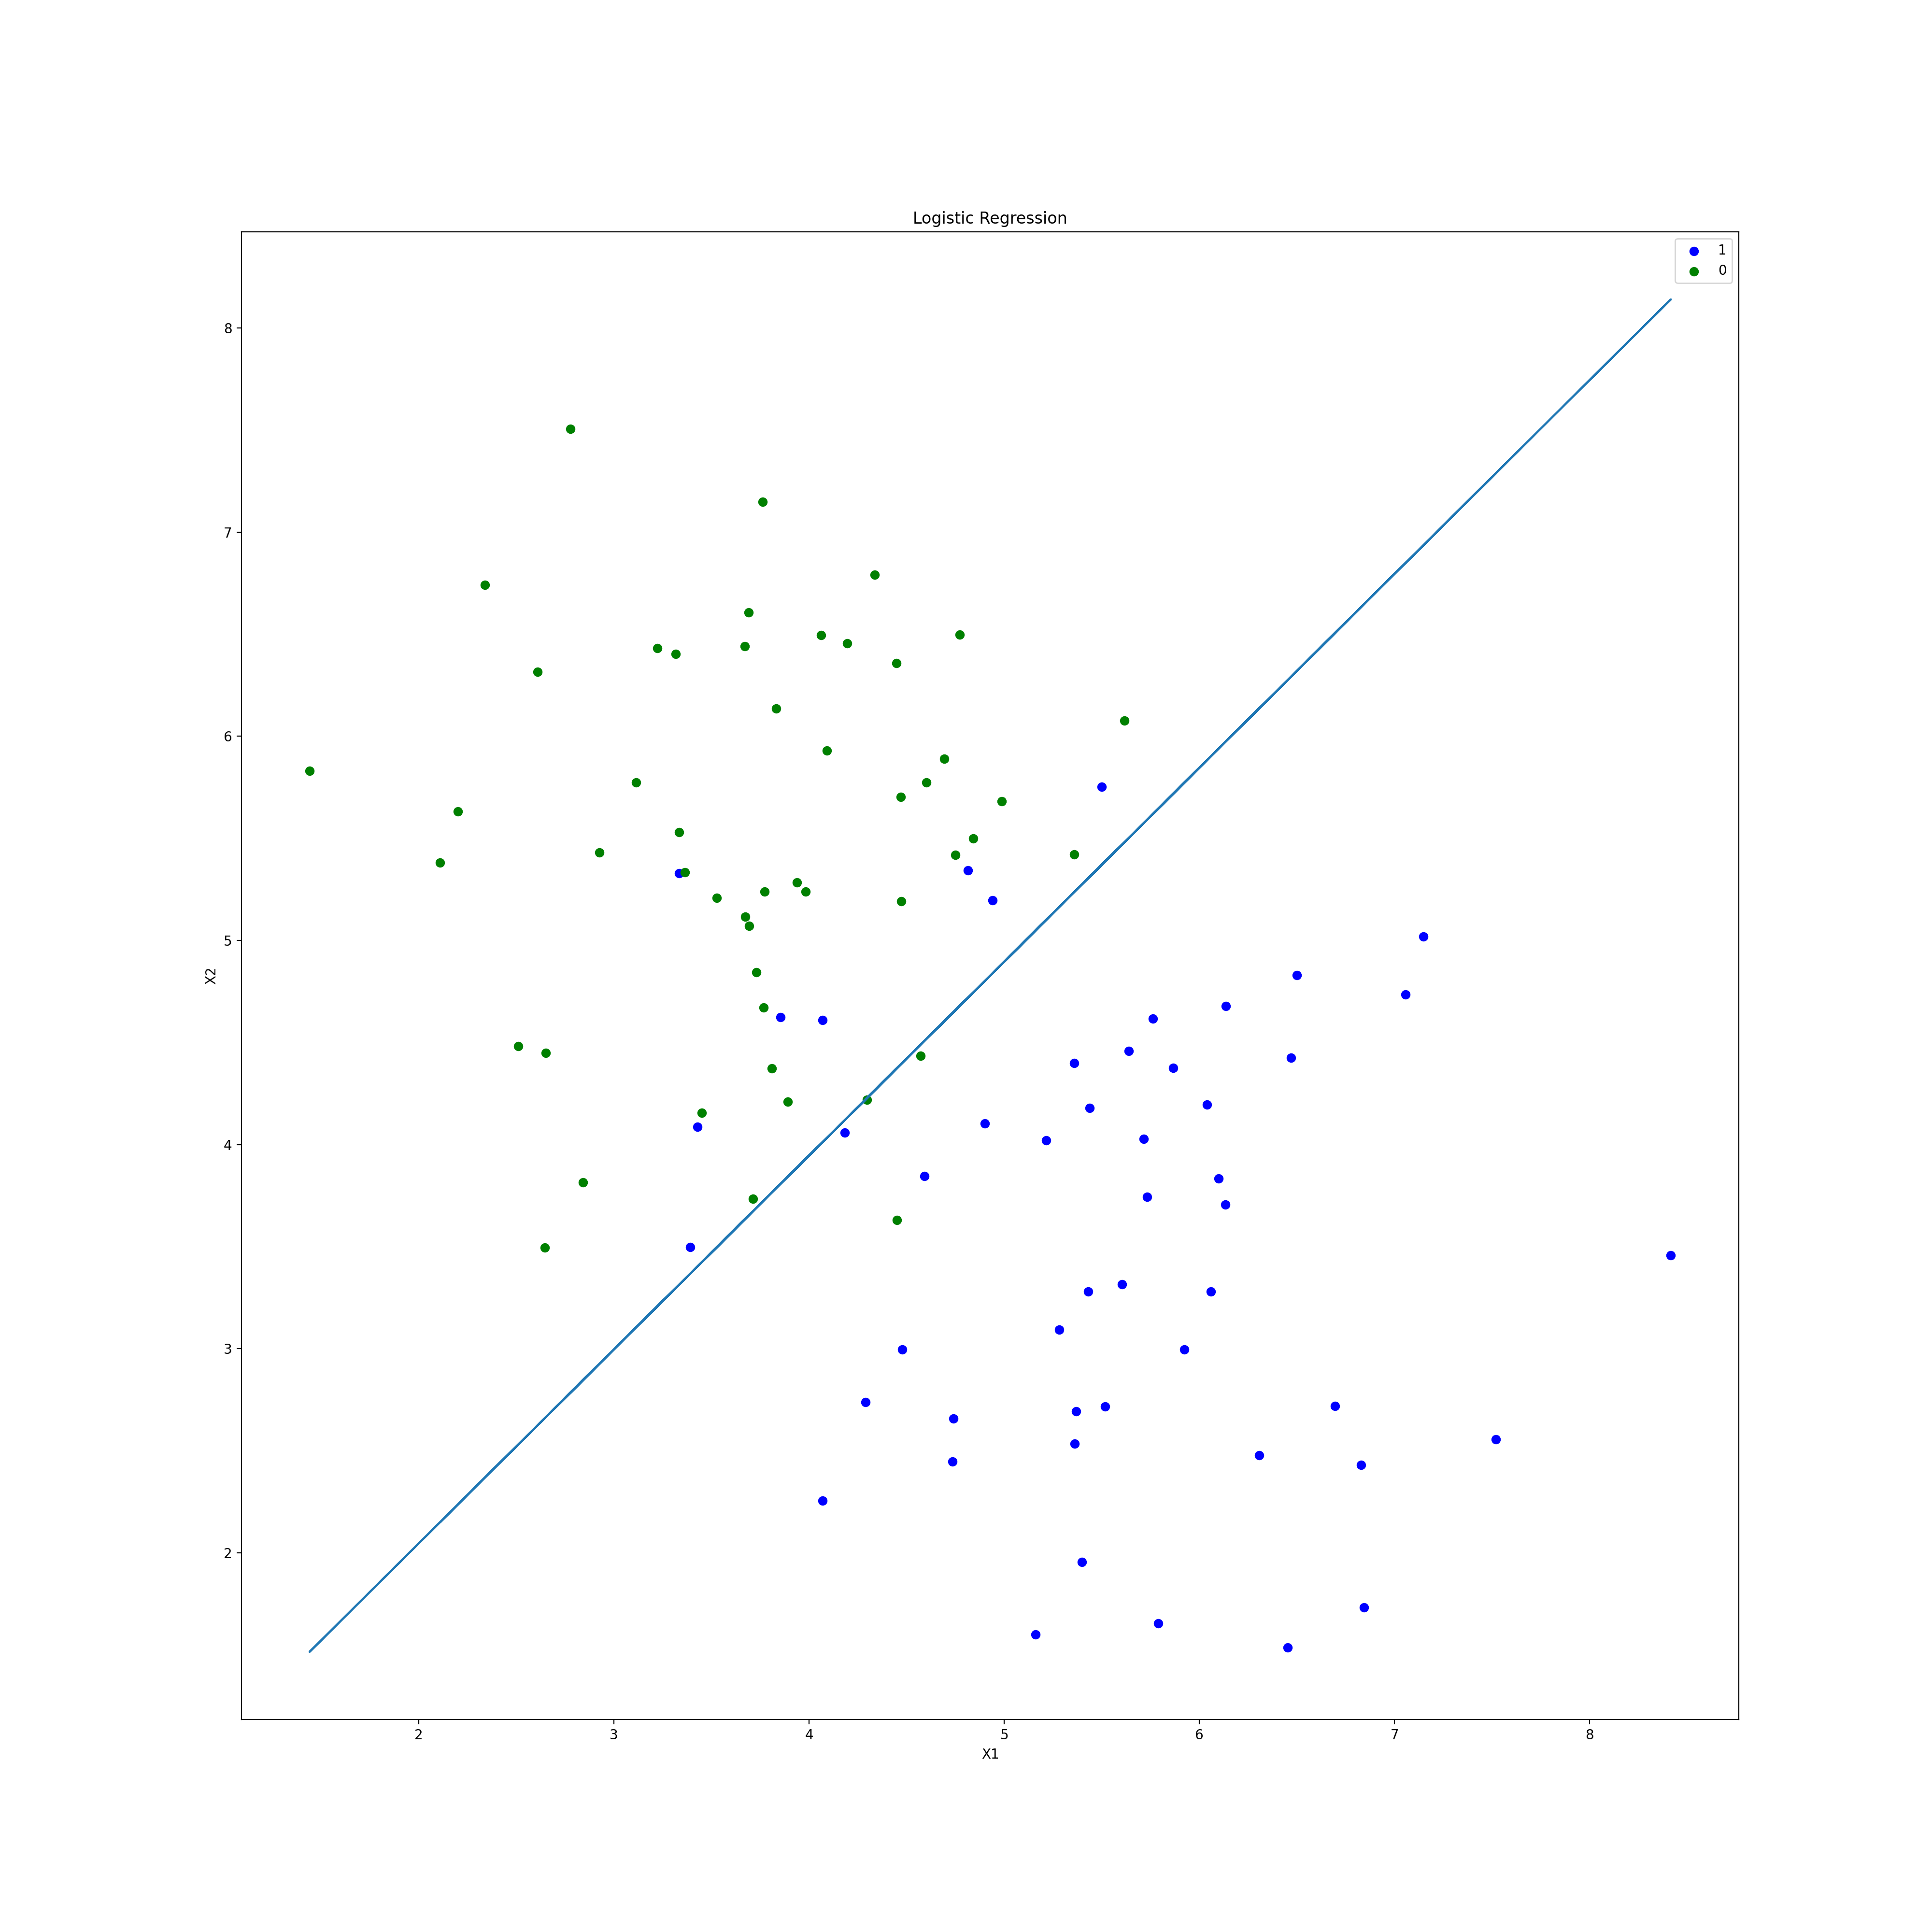

In [11]:
%matplotlib notebook
X1 = []
Y1 = []

X2 = []
Y2 = []

X3 = []
Y3 = []

for i in range(Y.shape[0]):
    if(Y[i][0]==1):
        X1.append(X[i][0])
        Y1.append(X[i][1])
    else:
        X2.append(X[i][0])
        Y2.append(X[i][1])
        
    X3.append(X[i][0])
    Y3.append(-1*(theta_f[0][0]+X[i][0]*theta_f[1][0])/theta_f[2][0])
        
print(X1,Y1)
print(X2,Y2)

line = []

plt.figure(figsize=(10,10))
plt.scatter(X1, Y1, label = '1',color="blue")
plt.scatter(X2, Y2, label ='0',color="green")
plt.plot(X3,Y3)

plt.legend(loc='upper right')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression")

Y3

plt.show()